# Integration and label transfer

We are checking if label transfer with scVI/scANVI can improve our annotation.

__created__ = "2025-11-09 Sun 21:49:34 GMT"

__updated__ = "2025-11-09"

__version__ = "0.0.9"

__status__ = "Prototype"

__maintainer__ = "Ciro Ramírez-Suástegui"

__author__ = "Ciro Ramírez-Suástegui"

__affiliation__ = "The Wellcome Sanger Institute"

__email__ = "cs59@sanger.ac.uk, cramsuig@gmail.com"

### Structure <a class="anchor" id="Structure"></a>

* Environment setup
* [Global configuration](#global-configuration)
  - Variables and paths
  - Visualisation parameters
* [Loading data](#loading-data)
* [Pre-processing](#pre-processing)
* [Main](#main)
* [Post-processing](#post-processing)
* [Save](#save)

## Environment setup
---

### Basic modules

In [1]:
import os, sys # paths and files control
import re # string control
import datetime # add current date to output

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [2]:
sys_path_add = ["../code/", "../src/"]
sys_path_add = [i for i in sys_path_add if os.path.exists(i)]
print("Adding %s to sys.path", sys_path_add)
[sys.path.append(i) for i in sys_path_add if i not in sys.path]

Adding %s to sys.path ['../code/', '../src/']


[None, None]

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

### In-house/developing modules

In [3]:
# Stuff I use across projects (in src)
import share.code.plotting as spl
import share.code.utils as utils
from share.code.mplborder import BORDER_RC

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

### Logging configuration

In [4]:
from logger import logger, _repo_root, _hide_base_path

[2025-11-10 09:56:35] INFO eCTCL [logger.py:setup_logger:155] Working at /eCTCL


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [5]:
# fmt: off
logger.info(f'Environ: {_hide_base_path(os.__file__)}')
logger.info(f'Project: {_hide_base_path(os.getcwd())} (current path)')
logger.info(os.popen("echo Machine: ${HOSTNAME} ${SLURMD_NODENAME} ${PBS_NODEFILE}").read().rstrip())
# fmt: on

[2025-11-10 09:56:35] INFO eCTCL [984088284.py:<module>:2] Environ: /miniforge3/envs/scvi-tools/lib/python3.11/os.py
[2025-11-10 09:56:35] INFO eCTCL [984088284.py:<module>:3] Project: /eCTCL/analysis (current path)
[2025-11-10 09:56:35] INFO eCTCL [984088284.py:<module>:4] Machine: farm22-gpu0305


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

### Tool (packaged) modules

In [6]:
import scanpy as sc
from anndata import read_zarr
import scvi
import pynndescent
import anndata
import numba

/software/cellgen/team361/cs59/miniforge3/envs/scvi-tools/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [7]:
import matplotlib.pyplot as plt # manage plotting styles and parameters

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

## [Global configuration](#menu) <a class="anchor" id="global-configuration"></a>
---

### Variables and paths

Propagation
* **indata_name** > result_name, inputs_file > output_name > output_file
* **action_name** > result_name, output_resu, output_file

In [8]:
indata_name = "sp_b1_hAtlas"
action_name = "ann-scANVI"
extent_strn = "zarr"
result_name = f"{indata_name}_{action_name}"

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [85]:
inputs_path = "../data"
inputs_ref = os.path.join(
    "../data/processed/suspension_ruoyan_2024/"
    "8_CTCL+PRJ+HRA+flex_4k_5dim_100hidd_raw_flex_corrected_leiden_broad_ct_cell_types_from_main_object.h5ad"
)
inputs_query = "../results/scAtlasTb/preprocessing/dataset~b1_hAtlas/file_id~merge:b1_hAtlas/preprocessed.zarr"

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [10]:
output_resu = os.path.join("./results", f"{result_name}")
output_figs = os.path.join("./results", f"{result_name}")
output_name = indata_name

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [86]:
output_file = os.path.join(
    inputs_path, "processed", f"{output_name}_{action_name}.{extent_strn}"
)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [12]:
OUTPUTS = dict()

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [13]:
%whos str dict

Variable       Type    Data/Info
--------------------------------
BORDER_RC      dict    n=3
OUTPUTS        dict    n=0
action_name    str     ann-scANVI
extent_strn    str     zarr
indata_name    str     sp_b1_hAtlas
inputs_path    str     ./data
inputs_query   str     ../results/scAtlasTb/prep<...>_hAtlas/preprocessed.zarr
inputs_ref     str     ../data/processed/suspens<...>pes_from_main_object.h5ad
output_figs    str     ./results/sp_b1_hAtlas_ann-scANVI
output_file    str     ./data/processed/sp_b1_hAtlas_ann-scANVI.zarr
output_name    str     sp_b1_hAtlas
output_resu    str     ./results/sp_b1_hAtlas_ann-scANVI
result_name    str     sp_b1_hAtlas_ann-scANVI


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

## [Loading data](#menu) <a class="anchor" id="loading-data"></a>
---

In [14]:
adata = sc.read(inputs_ref, backed="r")
# adata = adata_backed[adata_backed.obs["cluster"] == "a", :].to_memory()

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [15]:
logger.info("Object\n" + adata.__str__())

[2025-11-10 09:57:51] INFO eCTCL [1080568789.py:<module>:1] Object
AnnData object with n_obs × n_vars = 419579 × 15790 backed at '../data/processed/suspension_ruoyan_2024/8_CTCL+PRJ+HRA+flex_4k_5dim_100hidd_raw_flex_corrected_leiden_broad_ct_cell_types_from_main_object.h5ad'
    obs: 'Sanger_ID', 'tissue', 'site', 'Sex', 'batch', 'n_counts', 'n_genes', 'percent_mito', 'study', 'donor', 'tech', 'cell_type', 'barcode'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'broad_ct_colors', 'cell_type_colors', 'groups1_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'tech_colors'
    obsm: 'X_scVI', 'X_scVI_MDE', '_scvi_extra_categorical_covs'
    layers: 'raw_counts'
    obsp: 'connectivities', 'distances'


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [16]:
adata_query = read_zarr(inputs_query)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [17]:
logger.info("Object\n" + adata_query.__str__())

[2025-11-10 09:58:40] INFO eCTCL [1959450451.py:<module>:1] Object
AnnData object with n_obs × n_vars = 677350 × 4986
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'necrotic', 'n_genes', 'file_id', 'obs_names_before_b1_hAtlas'
    var: 'feature_types', 'gene_ids', 'genome', 'highly_variable', 'log1p_mean_counts', 'log1p_total_counts', 'mean_counts', 'n_cells', 'n_cells_by_counts', 'n_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'dataset', 'hvg', 'log1p', 'neighbors', 'pca', 'preprocessing', 'umap', 'wildcards'
    obsm: 'X_pca', 'X_umap', 'spati

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

## [Pre-processing](#menu) <a class="anchor" id="pre-processing"></a>
---

Subset to overlapping genes and calculatting top 2,000 HVGs from them

In [18]:
features_overlap = adata.var_names.isin(adata_query.var_names)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [19]:
logger.info(f"Overlapping features: {sum(features_overlap)}/{len(features_overlap)}")

[2025-11-10 09:58:40] INFO eCTCL [3189299779.py:<module>:1] Overlapping features: 4472/15790


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [20]:
adata_ref = adata[:, adata.var_names.isin(adata_query.var_names)].to_memory()

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [21]:
%%time
sc.pp.highly_variable_genes(
    adata_ref,
    flavor="seurat_v3",
    n_top_genes=2000,
    layer="raw_counts",
    batch_key="batch",
    subset=True,
)

CPU times: user 6.38 s, sys: 520 ms, total: 6.9 s
Wall time: 7.6 s


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

Adapting query to reference

In [22]:
adata_query.layers["raw_counts"] = adata_query.layers["counts"].copy()

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [23]:
del adata_query.layers["counts"]

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [24]:
adata_query.obs["batch"] = adata_query.obs["file_id"].copy()

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

## [Main](#menu) <a class="anchor" id="main"></a>
---

### Training scVI model as base (reference)

In [25]:
scvi.model.SCVI.setup_anndata(adata_ref, layer="raw_counts", batch_key="batch", labels_key="cell_type")

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [26]:
scvi_model = scvi.model.SCVI(adata_ref, n_layers=2, n_latent=30)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [27]:
scvi_model.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA H100 80GB HBM3') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 19/19: 100%|██████████| 19/19 [06:58<00:00, 22.18s/it, v_num=1, train_loss_step=487, train_loss_epoch=478]

`Trainer.fit` stopped: `max_epochs=19` reached.


Epoch 19/19: 100%|██████████| 19/19 [06:58<00:00, 22.05s/it, v_num=1, train_loss_step=487, train_loss_epoch=478]


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [28]:
SCVI_LATENT_KEY = "X_scVI_5k"

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [29]:
adata.obsm[SCVI_LATENT_KEY] = scvi_model.get_latent_representation()

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

### Training scANVI model (reference)

In [30]:
SCANVI_CELLTYPE_KEY = "celltype_scanvi"
adata_ref.obs[SCANVI_CELLTYPE_KEY] = "Unknown"

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [31]:
adata_ref.obs['_scvi_labels'].value_counts()

_scvi_labels
34    73562
31    49604
35    44224
3     24687
33    24672
6     20246
32    18513
46    15213
23    14384
38    12528
4     11016
2      9810
22     7065
8      7045
7      6719
21     5640
27     5610
45     5557
42     5338
1      5258
26     4760
25     4638
18     3994
39     3544
19     3059
37     2712
47     2710
10     2592
24     2406
36     2379
44     2267
5      2188
16     1981
28     1975
11     1966
15     1419
43     1319
9      1093
17      982
13      718
29      704
20      685
14      637
40      541
12      470
30      420
41      371
0       358
Name: count, dtype: int64

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [32]:
scvi_model.view_anndata_setup() # to check the label key

Anndata setup with scvi-tools version 1.3.2.

Setup via `SCVI.setup_anndata` with arguments:

{
│   'layer': 'raw_counts',
│   'batch_key': 'batch',
│   'labels_key': 'cell_type',
│   'size_factor_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃     Summary Stat Key     ┃ Value  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│         n_batch          │   51   │
│         n_cells          │ 419579 │
│ n_extra_categorical_covs │   0    │
│ n_extra_continuous_covs  │   0    │
│         n_labels         │   48   │
│          n_vars          │  2000  │
└──────────────────────────┴────────┘

                Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location     ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │ adata.layers['raw_counts'] │
│    batch     │  adata.obs['_scvi_batch']  │
│    labels    │ adata.obs['_scvi_labels']  │
└──────────────┴────────────────────────────┘

                     batch State Registry                     
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃  Source Location   ┃   Categories    ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch'] │        0        │          0          │
│                    │        1        │          1          │
│                    │        2        │          2          │
│                    │        3        │          3          │
│                    │        4        │          4          │
│                    │        5        │          5          │
│                    │        6        │          6          │
│                    │        7        │          7          │
│                    │        8        │          8          │
│                    │        9        │          9          │
│                    │       10        │         10          │
│                    │       11        │         11          │
│                    │       12        │         12          │
│                    │       13        │         13          │
│                    │       14        │         14          │
│                    │       15        │         15          │
│                    │       16        │         16          │
│                    │       17        │         17          │
│                    │       18        │         18          │
│                    │       19        │         19          │
│                    │       20        │         20          │
│                    │       21        │         21          │
│                    │       22        │         22          │
│                    │       23        │         23          │
│                    │       24        │         24          │
│                    │       25        │         25          │
│                    │       26        │         26          │
│                    │       27        │         27          │
│                    │       28        │         28          │
│                    │       29        │         29          │
│                    │       30        │         30          │
│                    │       31        │         31          │
│                    │       32        │         32          │
│                    │       33        │         33          │
│                    │       34        │         34          │
│                    │       35        │         35          │
│                    │       36        │         36          │
│                    │       37        │         37          │
│                    │       38        │         38          │
│                    │       39        │         39          │
│                    │ PR001409E_18_1A │         40          │
│                    │  PR2533_18_1A   │         41          │
│                    │ PR004642T_15_1A │         42          │
│                    │ PR008096T_19_1A │         43          │
│                    │ PR018817H_21_1B │         44          │
│                    │ PR030476F_16_1A │         45          │
│                    │ PR037703E_16_2A │         46          │
│                    │ PR038176R_19_1A │         47          │
│                    │ PR819876Q_20_1A │         48          │
│                    │ PR824258V_20_2A │         49          │
│                    │ PR839543V_20_1A │         50          │
└────────────────────┴─────────────────┴─────────────────────┘

                        labels State Registry                         
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃     Categories      ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['cell_type'] │        Basal        │          0          │
│                        │         DC1         │          1          │
│                        │         DC2         │          2          │
│                        │  Differentiated_KC  │          3          │
│                        │ Differentiated_KC*  │          4          │
│                        │         F1          │          5          │
│                        │         F2          │          6          │
│                        │         F3          │          7          │
│                        │       ILC1_3        │          8          │
│                        │       ILC1_NK       │          9          │
│                        │        ILC2         │         10          │
│                        │       Inf_mac       │         11          │
│                        │        LC_1         │         12          │
│                        │        LC_2         │         13          │
│                        │        LC_3         │         14          │
│                        │        LC_4         │         15          │
│                        │         LE1         │         16          │
│                        │         LE2         │         17          │
│                        │       Macro_1       │         18          │
│                        │       Macro_2       │         19          │
│                        │      Mast_cell      │         20          │
│                        │     Melanocyte      │         21          │
│                        │        MigDC        │         22          │
│                        │      Mono_mac       │         23          │
│                        │         NK          │         24          │
│                        │     Pericyte_1      │         25          │
│                        │     Pericyte_2      │         26          │
│                        │       Plasma        │         27          │
│                        │  Proliferating_KC   │         28          │
│                        │      Schwann_1      │         29          │
│                        │      Sebaceous      │         30          │
│                        │         Tc          │         31          │
│                        │      Tc17_Th17      │         32          │
│                        │    Tc_IL13_IL22     │         33          │
│                        │         Th          │         34          │
│                        │        Treg         │         35          │
│                        │ Undifferentiated_KC │         36          │
│                        │         VE1         │         37          │
│                        │         VE2         │         38          │
│                        │         VE3         │         39          │
│                        │       basal2        │         40          │
│                        │       channel       │         41          │
│                        │       immune        │         42          │
│                        │       moDC_1        │         43          │
│                        │       moDC_2        │         44          │
│                        │       moDC_3        │         45          │
│                        │       B_cell        │         46          │
│                        │         pDC         │         47          │
└────────────────────────┴─────────────────────┴─────────────────────┘

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [33]:
scanvi_model = scvi.model.SCANVI.from_scvi_model(
    scvi_model,
    adata=adata_ref,
    unlabeled_category="Unknown",
    labels_key=SCANVI_CELLTYPE_KEY,
)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [34]:
scanvi_model.view_anndata_setup() # to check the label key

Anndata setup with scvi-tools version 1.3.2.

Setup via `SCANVI.setup_anndata` with arguments:

{
│   'labels_key': 'cell_type',
│   'unlabeled_category': 'Unknown',
│   'layer': 'raw_counts',
│   'batch_key': 'batch',
│   'size_factor_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None,
│   'use_minified': False
}

         Summary Statistics          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃     Summary Stat Key     ┃ Value  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│         n_batch          │   51   │
│         n_cells          │ 419579 │
│ n_extra_categorical_covs │   0    │
│ n_extra_continuous_covs  │   0    │
│         n_labels         │   49   │
│          n_vars          │  2000  │
└──────────────────────────┴────────┘

                Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location     ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │ adata.layers['raw_counts'] │
│    batch     │  adata.obs['_scvi_batch']  │
│    labels    │ adata.obs['_scvi_labels']  │
└──────────────┴────────────────────────────┘

                     batch State Registry                     
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃  Source Location   ┃   Categories    ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch'] │        0        │          0          │
│                    │        1        │          1          │
│                    │        2        │          2          │
│                    │        3        │          3          │
│                    │        4        │          4          │
│                    │        5        │          5          │
│                    │        6        │          6          │
│                    │        7        │          7          │
│                    │        8        │          8          │
│                    │        9        │          9          │
│                    │       10        │         10          │
│                    │       11        │         11          │
│                    │       12        │         12          │
│                    │       13        │         13          │
│                    │       14        │         14          │
│                    │       15        │         15          │
│                    │       16        │         16          │
│                    │       17        │         17          │
│                    │       18        │         18          │
│                    │       19        │         19          │
│                    │       20        │         20          │
│                    │       21        │         21          │
│                    │       22        │         22          │
│                    │       23        │         23          │
│                    │       24        │         24          │
│                    │       25        │         25          │
│                    │       26        │         26          │
│                    │       27        │         27          │
│                    │       28        │         28          │
│                    │       29        │         29          │
│                    │       30        │         30          │
│                    │       31        │         31          │
│                    │       32        │         32          │
│                    │       33        │         33          │
│                    │       34        │         34          │
│                    │       35        │         35          │
│                    │       36        │         36          │
│                    │       37        │         37          │
│                    │       38        │         38          │
│                    │       39        │         39          │
│                    │ PR001409E_18_1A │         40          │
│                    │  PR2533_18_1A   │         41          │
│                    │ PR004642T_15_1A │         42          │
│                    │ PR008096T_19_1A │         43          │
│                    │ PR018817H_21_1B │         44          │
│                    │ PR030476F_16_1A │         45          │
│                    │ PR037703E_16_2A │         46          │
│                    │ PR038176R_19_1A │         47          │
│                    │ PR819876Q_20_1A │         48          │
│                    │ PR824258V_20_2A │         49          │
│                    │ PR839543V_20_1A │         50          │
└────────────────────┴─────────────────┴─────────────────────┘

                        labels State Registry                         
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃     Categories      ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['cell_type'] │        Basal        │          0          │
│                        │         DC1         │          1          │
│                        │         DC2         │          2          │
│                        │  Differentiated_KC  │          3          │
│                        │ Differentiated_KC*  │          4          │
│                        │         F1          │          5          │
│                        │         F2          │          6          │
│                        │         F3          │          7          │
│                        │       ILC1_3        │          8          │
│                        │       ILC1_NK       │          9          │
│                        │        ILC2         │         10          │
│                        │       Inf_mac       │         11          │
│                        │        LC_1         │         12          │
│                        │        LC_2         │         13          │
│                        │        LC_3         │         14          │
│                        │        LC_4         │         15          │
│                        │         LE1         │         16          │
│                        │         LE2         │         17          │
│                        │       Macro_1       │         18          │
│                        │       Macro_2       │         19          │
│                        │      Mast_cell      │         20          │
│                        │     Melanocyte      │         21          │
│                        │        MigDC        │         22          │
│                        │      Mono_mac       │         23          │
│                        │         NK          │         24          │
│                        │     Pericyte_1      │         25          │
│                        │     Pericyte_2      │         26          │
│                        │       Plasma        │         27          │
│                        │  Proliferating_KC   │         28          │
│                        │      Schwann_1      │         29          │
│                        │      Sebaceous      │         30          │
│                        │         Tc          │         31          │
│                        │      Tc17_Th17      │         32          │
│                        │    Tc_IL13_IL22     │         33          │
│                        │         Th          │         34          │
│                        │        Treg         │         35          │
│                        │ Undifferentiated_KC │         36          │
│                        │         VE1         │         37          │
│                        │         VE2         │         38          │
│                        │         VE3         │         39          │
│                        │       basal2        │         40          │
│                        │       channel       │         41          │
│                        │       immune        │         42          │
│                        │       moDC_1        │         43          │
│                        │       moDC_2        │         44          │
│                        │       moDC_3        │         45          │
│                        │       B_cell        │         46          │
│                        │         pDC         │         47          │
│                        │       Unknown       │         48          │
└────────────────────────┴─────────────────────┴─────────────────────┘

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [35]:
scanvi_model.train(max_epochs=20, n_samples_per_label=300)

INFO     Training for 20 epochs.                                                                                   


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 20/20: 100%|██████████| 20/20 [1:39:24<00:00, 361.59s/it, v_num=1, train_loss_step=434, train_loss_epoch=479]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|██████████| 20/20 [1:39:24<00:00, 298.20s/it, v_num=1, train_loss_step=434, train_loss_epoch=479]


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [36]:
SCANVI_LATENT_KEY = "X_scANVI_5k"
adata_ref.obsm[SCANVI_LATENT_KEY] = scanvi_model.get_latent_representation(adata_ref)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

### Training scANVI model (query)

In [37]:
scvi.model.SCANVI.prepare_query_anndata(adata_query, scanvi_model)

INFO     Found 100.0% reference vars in query data.                                                                


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [38]:
adata_query.obs[SCANVI_CELLTYPE_KEY] = "Unknown"

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [39]:
query_model = scvi.model.SCANVI.load_query_data(adata_query, scanvi_model)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [40]:
surgery_epochs = 500
train_kwargs_surgery = {
    "early_stopping": True,
    "early_stopping_monitor": "elbo_train",
    "early_stopping_patience": 10,
    "early_stopping_min_delta": 0.001,
    "plan_kwargs": {"weight_decay": 0.0},
}

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [41]:
query_model.train(max_epochs=surgery_epochs, **train_kwargs_surgery)

INFO     Training for 500 epochs.                                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 12/500:   2%|▏         | 12/500 [1:03:08<42:47:57, 315.73s/it, v_num=1, train_loss_step=158, train_loss_epoch=194]
Monitored metric elbo_train did not improve in the last 10 records. Best score: 278.133. Signaling Trainer to stop.


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

### Learn a neighbors index on reference latent space

In [42]:
X_train = adata_ref.obsm[SCANVI_LATENT_KEY]

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [43]:
ref_nn_index = pynndescent.NNDescent(X_train)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [44]:
ref_nn_index.prepare()

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [45]:
query_emb = anndata.AnnData(query_model.get_latent_representation())
query_emb.obs_names = adata_query.obs_names

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [46]:
ref_neighbors, ref_distances = ref_nn_index.query(query_emb.X)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [47]:
# convert distances to affinities
stds = np.std(ref_distances, axis=1)
stds = (2.0 / stds) ** 2
stds = stds.reshape(-1, 1)
ref_distances_tilda = np.exp(-np.true_divide(ref_distances, stds))
weights = ref_distances_tilda / np.sum(ref_distances_tilda, axis=1, keepdims=True)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [48]:
@numba.njit
def weighted_prediction(weights, ref_cats):
    """Get highest weight category."""
    N = len(weights)
    predictions = np.zeros((N,), dtype=ref_cats.dtype)
    uncertainty = np.zeros((N,))
    for i in range(N):
        obs_weights = weights[i]
        obs_cats = ref_cats[i]
        best_prob = 0
        for c in np.unique(obs_cats):
            cand_prob = np.sum(obs_weights[obs_cats == c])
            if cand_prob > best_prob:
                best_prob = cand_prob
                predictions[i] = c
                uncertainty[i] = max(1 - best_prob, 0)

    return predictions, uncertainty

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [49]:
# for each annotation level, get prediction and uncertainty
label_keys = ["cell_type"]
for l in label_keys:
    ref_cats = adata_ref.obs[l].cat.codes.to_numpy()[ref_neighbors]
    p, u = weighted_prediction(weights, ref_cats)
    p = np.asarray(adata_ref.obs[l].cat.categories)[p]
    query_emb.obs[l + "_pred"], query_emb.obs[l + "_uncertainty"] = p, u

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [50]:
uncertainty_threshold = 0.2
for l in label_keys:
    mask = query_emb.obs[l + "_uncertainty"] > 0.2
    print(f"{l}: {sum(mask) / len(mask)} unknown")
    query_emb.obs[l + "_pred"].loc[mask] = "Unknown"

cell_type: 0.620140252454418 unknown


/tmp/ipykernel_950795/368783601.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query_emb.obs[l + "_pred"].loc[mask] = "Unknown"


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [51]:
query_emb.obs["ref_query"] = "query"

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

### Combine embeddings

In [52]:
ref_emb = anndata.AnnData(X_train, obs=adata_ref.obs)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [53]:
ref_emb.obs["ref_query"] = "ref"

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [54]:
combined_emb = ref_emb.concatenate(query_emb)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [55]:
LATENT_KEY = "X_scanVI"
combined_emb.obsm[LATENT_KEY] = combined_emb.X

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [56]:
sc.pp.neighbors(combined_emb, use_rep=LATENT_KEY)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [57]:
del adata

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

ERROR! Session/line number was not unique in database. History logging moved to new session 1308


In [62]:
del adata_ref
del adata_query

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [63]:
gc.collect()

418

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [64]:
sc.tl.umap(combined_emb)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [69]:
combined_emb

AnnData object with n_obs × n_vars = 1096929 × 30
    obs: 'Sanger_ID', 'tissue', 'site', 'Sex', 'batch', 'n_counts', 'n_genes', 'percent_mito', 'study', 'donor', 'tech', 'cell_type', 'barcode', '_scvi_batch', '_scvi_labels', 'celltype_scanvi', 'ref_query', 'cell_type_pred', 'cell_type_uncertainty'
    uns: 'neighbors', 'umap', 'cell_type_colors'
    obsm: 'X_scanVI', 'X_umap'
    obsp: 'distances', 'connectivities'

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [102]:
fig_config = {
    "plot_type": "umap",
    "col_var": "cell_type",
    "params": {"frameon": False}
}
filename = utils.filename_create(**spl.filename_plot(fig_config))
filename

'umap___cell-type_____frameon:False'

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

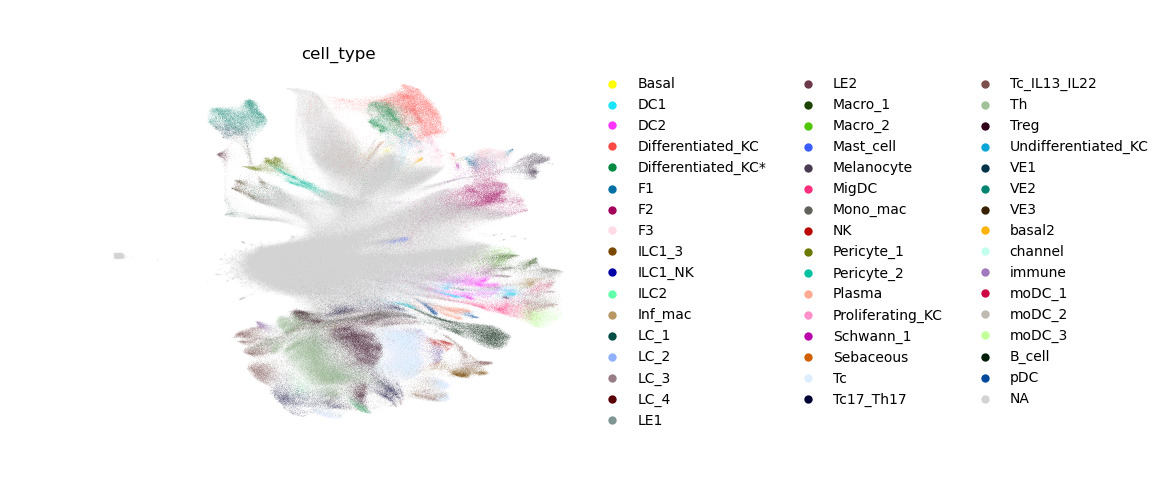

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [103]:
with plt.rc_context({"patch.linewidth": 0.001}):
    OUTPUTS.update({
        filename: sc.pl.embedding(
            combined_emb,
            basis="X_umap",
            color=fig_config["col_var"],
            return_fig=True,
            **fig_config["params"],
        )
    })

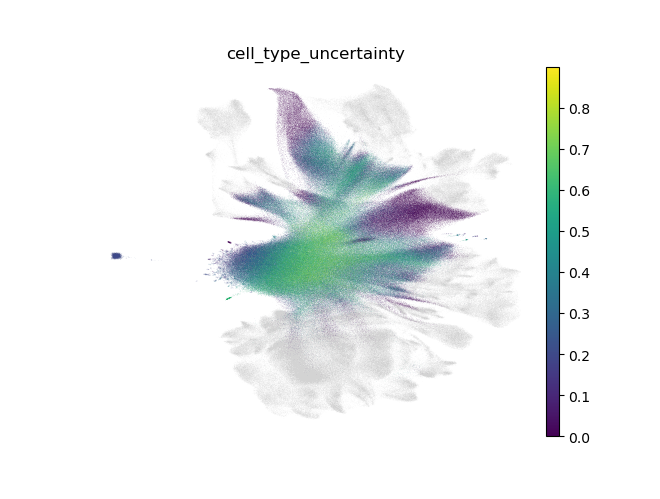

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [104]:
colors = [l + "_uncertainty" for l in label_keys]
fig_config["col_var"] = colors[0]
filename = utils.filename_create(**spl.filename_plot(fig_config))
with plt.rc_context({"patch.linewidth": 0.001}):
    OUTPUTS.update({
        filename: sc.pl.embedding(
            combined_emb,
            basis="X_umap",
            color=fig_config["col_var"],
            return_fig=True,
            **fig_config["params"],
        )
    })

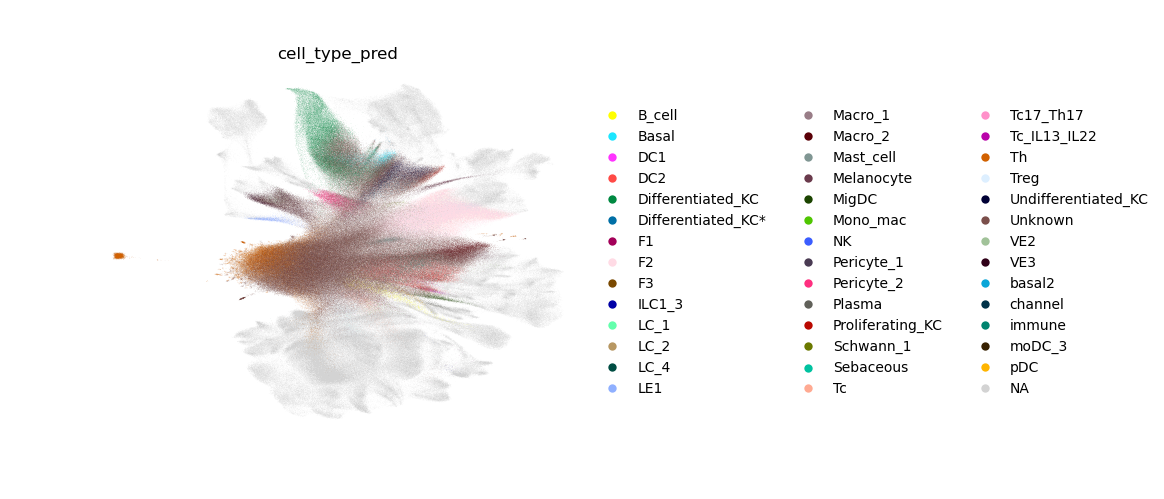

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [99]:
colors = [l + "_pred" for l in label_keys]
fig_config["col_var"] = colors[0]
filename = utils.filename_create(**spl.filename_plot(fig_config))
with plt.rc_context({"patch.linewidth": 0.001}):
    OUTPUTS.update({
        filename: sc.pl.embedding(
            combined_emb,
            basis="X_umap",
            color=fig_config["col_var"],
            return_fig=True,
            **fig_config["params"],
        )
    })

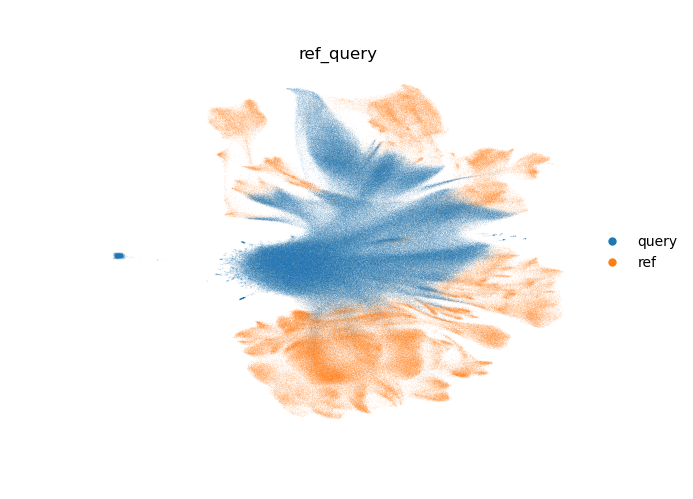

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [100]:
fig_config["col_var"] = "ref_query"
filename = utils.filename_create(**spl.filename_plot(fig_config))
with plt.rc_context({"patch.linewidth": 0.001}):
    OUTPUTS.update({
        filename: sc.pl.embedding(
            combined_emb,
            basis="X_umap",
            color=fig_config["col_var"],
            return_fig=True,
            **fig_config["params"],
        )
    })

In [ ]:
sc.pp.calculate_qc_metrics(
    combined_emb, percent_top=None, log1p=False, inplace=True
)

## [Post-processing](#menu) <a class="anchor" id="post-processing"></a>
---

In [105]:
temp = list(OUTPUTS.keys())
logger.info(f"Outputs captured ({len(temp)}):\n " + "\n ".join(temp))

[2025-11-10 14:16:55] INFO eCTCL [641707671.py:<module>:2] Outputs captured (5):
 umap___cell-type-pred_____
 umap___cell-type-pred_____frameon:False
 umap___ref-query_____frameon:False
 umap___cell-type_____frameon:False
 umap___cell-type-uncertainty_____frameon:False


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [ ]:
temp = list(OUTPUTS.keys())
OUTPUTS_FINAL = OUTPUTS.copy()

In [ ]:
for i in temp:
    if len(re.findall(r"params|colours", i)) > 0:
        del OUTPUTS_FINAL[i]

In [ ]:
temp = list(OUTPUTS_FINAL.keys())
logger.info(f"Outputs to write ({len(temp)}):\n " + "\n ".join(temp))

## [Save](#menu) <a class="anchor" id="save"></a>
---

In [106]:
output_resu

'./results/sp_b1_hAtlas_ann-scANVI'

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [107]:
utils.output_save_list(OUTPUTS, output_resu)

Storing<class 'matplotlib.figure.Figure'>
./results/sp_b1_hAtlas_ann-scANVI/00_umap___cell-type-pred_____  √
Storing<class 'matplotlib.figure.Figure'>
./results/sp_b1_hAtlas_ann-scANVI/01_umap___cell-type-pred_____frameon:False  √
Storing<class 'matplotlib.figure.Figure'>
./results/sp_b1_hAtlas_ann-scANVI/02_umap___ref-query_____frameon:False  √
Storing<class 'matplotlib.figure.Figure'>
./results/sp_b1_hAtlas_ann-scANVI/03_umap___cell-type_____frameon:False  √
Storing<class 'matplotlib.figure.Figure'>
./results/sp_b1_hAtlas_ann-scANVI/04_umap___cell-type-uncertainty_____frameon:False  √


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [81]:
scanvi_model.save(inputs_query.replace(".zarr", "_ref_model"))

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [82]:
query_model.save(inputs_query.replace(".zarr", "_model"))

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [88]:
logger.info(f"Saving results to:\n{output_file}")

[2025-11-10 13:58:11] INFO eCTCL [1882014874.py:<module>:1] Saving results to:
../data/processed/sp_b1_hAtlas_ann-scANVI.zarr


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [87]:
combined_emb.write(output_file.replace(".zarr", "_combined.h5ad"))

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

Done.